<a href="https://colab.research.google.com/github/michalis0/Business-Intelligence-and-Analytics/blob/master/labs/05%20-%20Clustering/exercises/Exercise_Lab05_sol.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Exercise 1: Clustering

In this exercise we will look at student grades. We will cluster these grades into a number of groups that fits the data.

First let's read in the data into a Pandas data frame:

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
%matplotlib inline

In [ ]:
url = "https://media.githubusercontent.com/media/michalis0/Business-Intelligence-and-Analytics/master/data/grades.csv"


grades = pd.read_csv(url, names=['Grades', 'Other']).iloc[:, 0].to_frame()

grades.head(10)

,Grades
0,1.00
1,20.83
2,47.50
3,50.00
4,50.00
5,52.50
6,52.50
7,52.50
8,55.00
9,55.00


####1. How many observations are in the grades dataframe?

In [ ]:
print(f"There are {len(grades)} observations.")

There are 105 observations.


#### 2. Plot a histogram of the Grades series

[Text(0.5, 1.0, 'Histogram of student grades')]

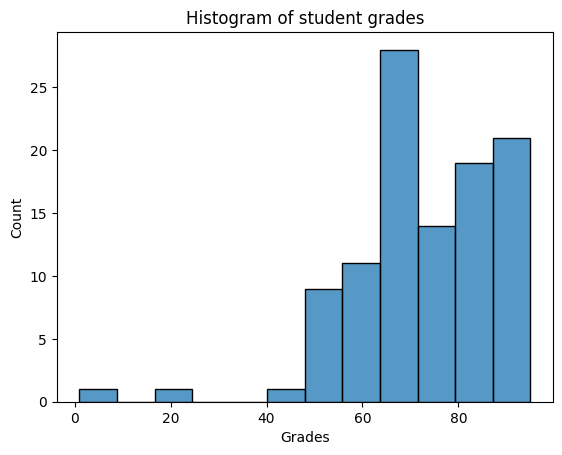

In [ ]:
sns.histplot(grades['Grades']).set(title='Histogram of student grades')

#### 3. Plot the grades as a one-dimension scatterplot:

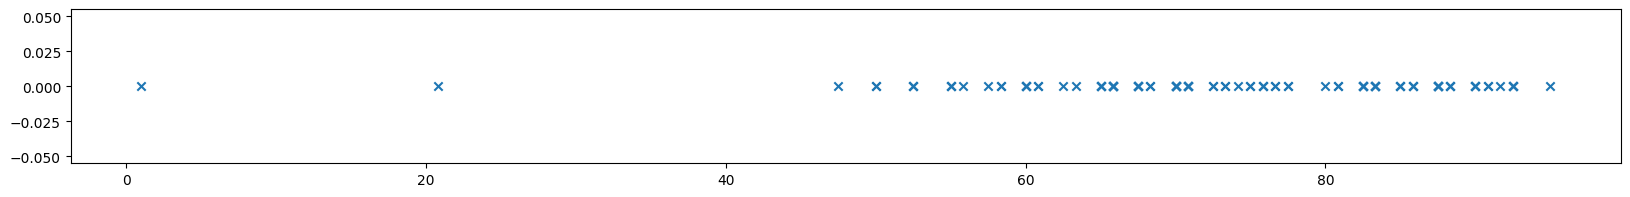

In [ ]:
plt.figure(figsize=(20,2))
plt.scatter(grades, np.zeros_like(grades), marker='x')

#### 4. Fit a KMeans algorithm for k=2, random_state=0, as shown in the walkthrough

In [ ]:
# create an instace
model2=KMeans(n_clusters=2, random_state=0)

# fit the model on grades
model2.fit(grades)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2, random_state=0)

#### 5. Print the resulting model labels, the cluster centers and make a one-dimension scatterplot with the grades colored by the cluster they belong to.

In [ ]:
#Print the labels
model2.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [ ]:
#Print the cluster centers
model2.cluster_centers_

array([[61.46415094],
       [84.19769231]])

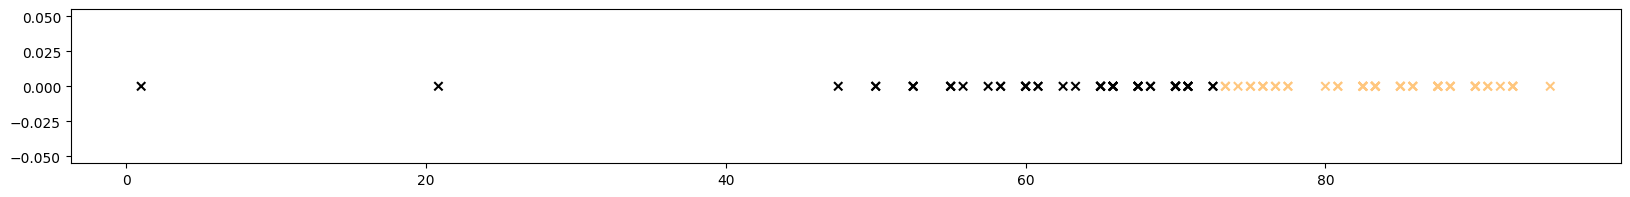

In [ ]:
#One dimension Scatterplot
plt.figure(figsize=(20,2))
plt.scatter(grades, np.zeros_like(grades), marker='x', c=model2.labels_, cmap='copper')

##### Add the cluster centers to your scatterplot above in red

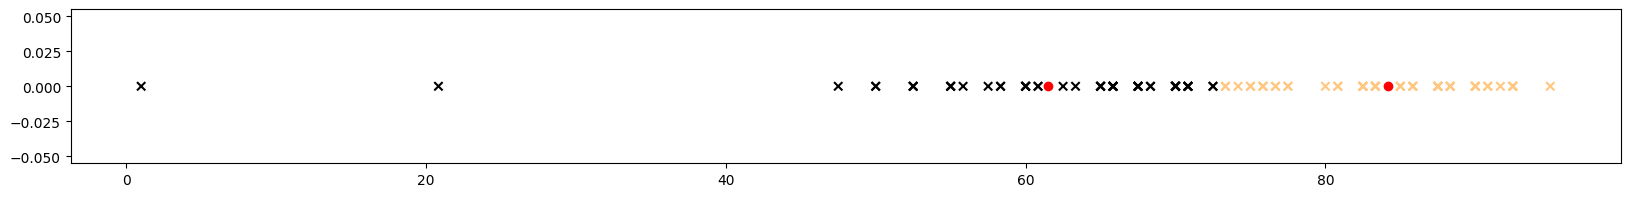

In [ ]:
plt.figure(figsize=(20,2))
plt.scatter(grades, np.zeros_like(grades), marker='x', c=model2.labels_, cmap='copper')
plt.scatter(model2.cluster_centers_, np.zeros_like(model2.cluster_centers_), color='red')

#### 6. Use the elbow method to find the optimal value of k.

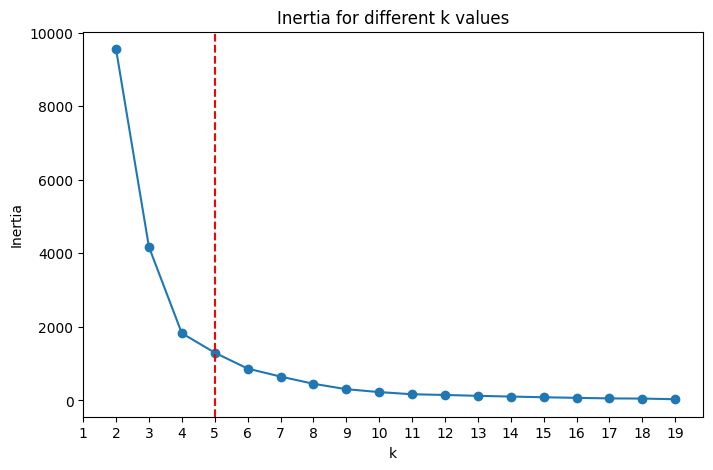

In [ ]:
inertia = []
k_values = range(2, 20)
for k in k_values:
  model = KMeans(n_clusters=k, random_state=0, n_init=5)
  model.fit(grades)
  inertia.append(model.inertia_)

# Plot
plt.figure(figsize=(8,5))
plt.plot(k_values, inertia, marker='o', linestyle='solid')
plt.title('Inertia for different k values')
plt.ylabel('Inertia')
plt.xlabel('k')
plt.xticks(np.arange(min(k_values)-1, max(k_values)+1, step=1))
plt.axvline(x=5, color='r', linestyle='--')
plt.show()

#### 7. Use an AgglomerativeClustering model, with 4 clusters, euclidean distance and average linkage to partition the grades

In [ ]:
from sklearn.cluster import AgglomerativeClustering
clustering = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='average')
clustering.fit(grades)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


AgglomerativeClustering(affinity='euclidean', linkage='average', n_clusters=4)

In [ ]:
clustering.labels_

array([3, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

#### 8. Use the one-dimensional scatter plot to show how the clusters were formed with the hierachical clustering model trained above

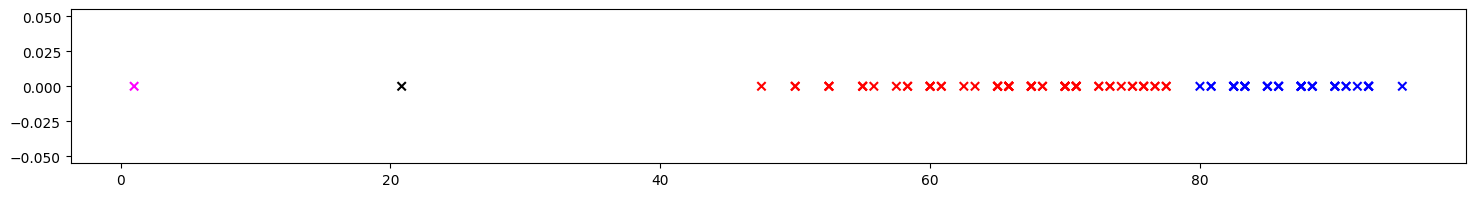

In [ ]:
# Plot the grades colored by the labels of the hierarchical model trained above
plt.figure(figsize=(18,2))
colors = ["red", "black", "blue", "magenta"]
plt.scatter(grades, np.zeros_like(grades), marker='x', c=[colors[i] for i in clustering.labels_])

#### 9. Plot the dendrogram for the hierarchical clustering model trained above

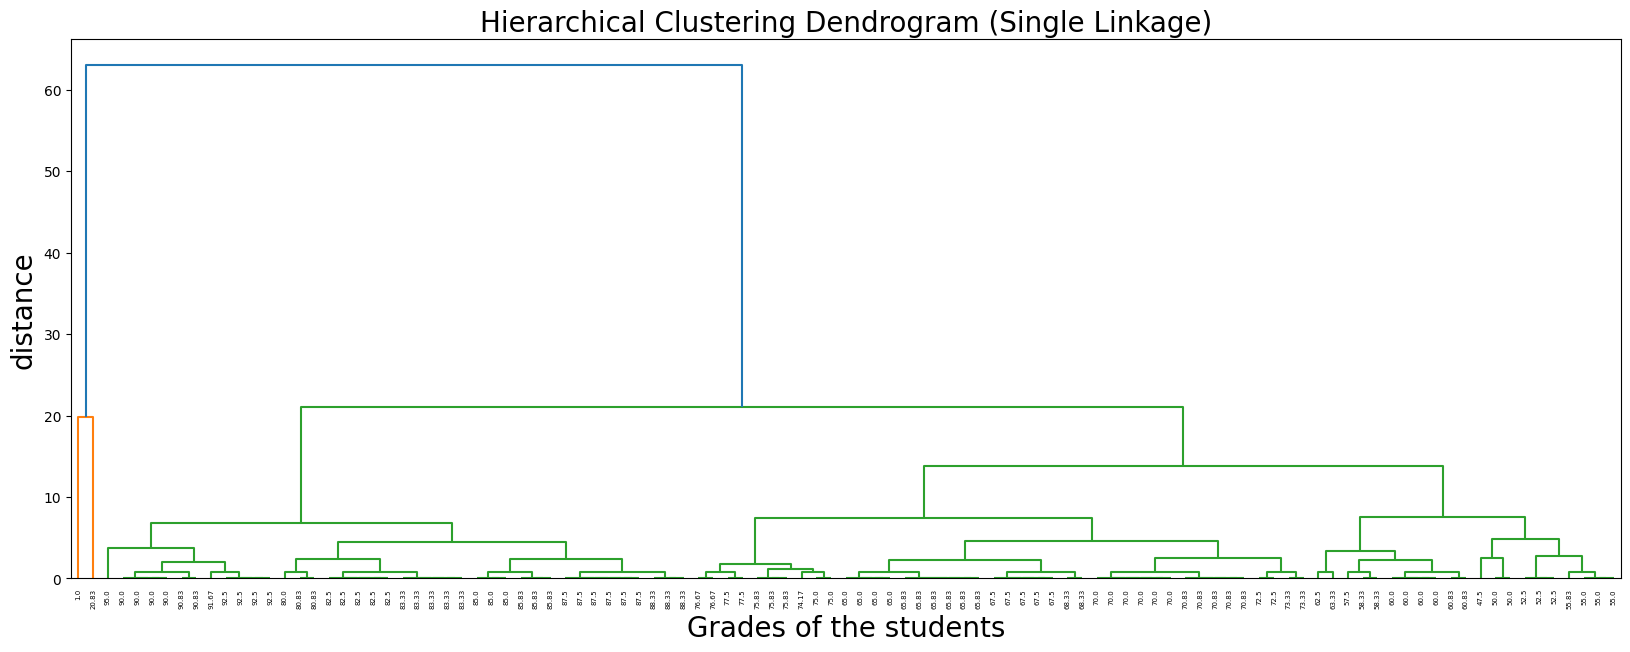

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage

plt.figure(figsize=(20, 7))
plt.title('Hierarchical Clustering Dendrogram (Single Linkage)', fontsize=20)
plt.xlabel('Grades of the students', fontsize=20)
plt.ylabel('distance', fontsize=20)

Z = linkage(grades, method='average', metric='euclidean') #Provide the linkage method we want and the chosen distance metric.
dendrogram(Z, labels=np.array(grades).flatten()) #compute the dendogram according the linkage

plt.show()